In [51]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import re

<H3>Rozetka

In [52]:
#Косметика
file_roz_krasa = r"D:\testmaudau\parsed_data_rozetka\krasa.csv"
df_roz_krasa = pd.read_csv(file_roz_krasa)
df_roz_krasa['Категорія'] = 'Краса і догляд'
df_roz_krasa['Тип товару'] = 'Догляд за обличчям'
df_roz_krasa['Time'] = datetime.fromtimestamp(os.path.getmtime(file_roz_krasa))

#Міцні напої
file_roz_micni = r"D:\testmaudau\parsed_data_rozetka\micninapoi.csv"
df_roz_micni = pd.read_csv(file_roz_micni)
df_roz_micni['Категорія'] = 'Алкогольні напої'
df_roz_micni['Тип товару'] = 'Міцні напої'
df_roz_micni['Time'] = datetime.fromtimestamp(os.path.getmtime(file_roz_micni))

#Вино
file_roz_wine = r"D:\testmaudau\parsed_data_rozetka\wine.csv"
df_roz_wine = pd.read_csv(file_roz_wine)
df_roz_wine['Категорія'] = 'Алкогольні напої'
df_roz_wine['Тип товару'] = 'Вино'
df_roz_wine['Time'] = datetime.fromtimestamp(os.path.getmtime(file_roz_wine))

#Побутова хімія (Засоби для миття)
file_roz_pobut_myttia_posudu = r"D:\testmaudau\parsed_data_rozetka\pobut_myttia_posudu.csv"
df_roz_prybyrannia_ta_myttia = pd.read_csv(file_roz_pobut_myttia_posudu)
df_roz_prybyrannia_ta_myttia['Категорія'] = 'Побутова хімія'
df_roz_prybyrannia_ta_myttia['Тип товару'] = 'Засоби миття'
df_roz_prybyrannia_ta_myttia['Time'] = datetime.fromtimestamp(os.path.getmtime(file_roz_pobut_myttia_posudu))

#Побутова хімія (Прання)
file_roz_prannia = r"D:\testmaudau\parsed_data_rozetka\pobut_prannia.csv"
df_roz_prannia = pd.read_csv(file_roz_prannia)
df_roz_prannia['Категорія'] = 'Побутова хімія'
df_roz_prannia['Тип товару'] = 'Засоби для прання'
df_roz_prannia['Time'] = datetime.fromtimestamp(os.path.getmtime(file_roz_prannia))

#з'єднуємо горизонтально файли
df_rozetka = pd.concat([df_roz_krasa,
                        df_roz_micni,
                        df_roz_wine,
                        df_roz_prybyrannia_ta_myttia,
                        df_roz_prannia])

#Розрахонок суми знижки
df_rozetka['discount_amount_uah'] = df_rozetka.apply(
    lambda x: x['old_price'] - x['price'] if x['old_price'] > 0 else 0,
    axis=1
)

df_rozetka = df_rozetka[['Time', 'Категорія','Тип товару','title','url', 'price', 'old_price', 'discount_amount_uah', 'discount_percent','rating', 'brand']]
df_rozetka.rename(columns={'brand': 'Підкатегорія/Бренд'}, inplace=True)
df_rozetka['Time'] = pd.to_datetime(df_rozetka['Time'], format="%Y-%m-%d %H:%M", errors='coerce')
df_rozetka = df_rozetka.sort_values(by=['Категорія', 'price'], ascending=[True,False])
df_rozetka['Marketplace'] = 'Rozetka'
df_rozetka['title'] = df_rozetka['title'].str.replace(r"\(\s*\d{12,14}\s*\)", "", regex=True).str.strip()
print(len(df_rozetka))
df_rozetka

20628


,Time,Категорія,Тип товару,title,url,price,old_price,discount_amount_uah,discount_percent,rating,Підкатегорія/Бренд,Marketplace
1884,2025-12-06 16:34:27.263833,Алкогольні напої,Міцні напої,Віскі Royal Salute 51 рік 0.7л 45.5% у подарун...,https://rozetka.com.ua/ua/bez-brenda-500029962...,1354080,NaN,0.0,NaN,NaN,Віскі,Rozetka
1941,2025-12-06 16:34:27.263833,Алкогольні напої,Міцні напої,Арманьяк Joy by Paco Rabanne 1897 0.7 л 40.8%,https://rozetka.com.ua/ua/joy_3557755239720/p6...,1022085,NaN,0.0,NaN,NaN,Арманьяк,Rozetka
2266,2025-12-06 16:34:27.263833,Алкогольні напої,Міцні напої,Арманьяк Baron Gaston Legrand Bas Armagnac 188...,https://rozetka.com.ua/ua/baron_gaston_legrand...,793260,NaN,0.0,NaN,NaN,Арманьяк,Rozetka
2133,2025-12-06 16:34:27.263833,Алкогольні напої,Міцні напої,Арманьяк Baron Gaston Legrand Bas Armagnac Car...,https://rozetka.com.ua/ua/baron_gaston_legrand...,756249,914760.0,158511.0,17.0,NaN,Арманьяк,Rozetka
2585,2025-12-06 16:34:27.263833,Алкогольні напої,Міцні напої,Арманьяк Baron Gaston Legrand Bas Armagnac Car...,https://rozetka.com.ua/ua/baron_gaston_legrand...,668749,808583.0,139834.0,17.0,NaN,Арманьяк,Rozetka
...,...,...,...,...,...,...,...,...,...,...,...,...
4060,2025-12-06 17:08:25.718618,Побутова хімія,Засоби для прання,Підсинювач 50 г (85487),https://rozetka.com.ua/ua/433903907/p433903907/,7,NaN,0.0,NaN,NaN,Підсинювач,Rozetka
2592,2025-12-06 17:08:25.718618,Побутова хімія,Засоби для прання,"Гелева капсула для прання ""Panda"", 5 в 1, з кв...",https://rozetka.com.ua/ua/432910355/p432910355/,6,12.0,6.0,50.0,NaN,Гелева,Rozetka
2827,2025-12-06 17:08:25.718618,Побутова хімія,Засоби для прання,"Гелева капсула для прання ""Clean"", 5 в 1, з фр...",https://rozetka.com.ua/ua/432910259/p432910259/,6,12.0,6.0,50.0,NaN,Гелева,Rozetka
2966,2025-12-06 17:08:25.718618,Побутова хімія,Засоби для прання,"Гелева капсула для прання ""Triple Heart"", 3 в ...",https://rozetka.com.ua/ua/432910364/p432910364/,6,12.0,6.0,50.0,NaN,Гелева,Rozetka


<H3>MauDau

In [53]:
#Косметика
file_maudau_krasa = r"D:\testmaudau\parsed_data_maudau\krasa_maudau.csv"
df_maudau_krasa = pd.read_csv(file_maudau_krasa)
df_maudau_krasa['Категорія'] = 'Краса і догляд'
df_maudau_krasa['Тип товару'] = 'Догляд за обличчям'
df_maudau_krasa['Time'] = datetime.fromtimestamp(os.path.getmtime(file_maudau_krasa))

#Побутова хімія (Прання)
file_maudau_pobut_prannia = r"D:\testmaudau\parsed_data_maudau\maudau_pobut_prannia.csv"
df_maudau_pobut_prannia = pd.read_csv(file_maudau_pobut_prannia)
df_maudau_pobut_prannia['Категорія'] = 'Побутова хімія'
df_maudau_pobut_prannia['Тип товару'] = 'Засоби для прання'
df_maudau_pobut_prannia['Time'] = datetime.fromtimestamp(os.path.getmtime(file_maudau_pobut_prannia))

#Міцні напої
file_maudau_micni = r"D:\testmaudau\parsed_data_maudau\maudau_pobut_prannia.csv"
df_maudau_micni = pd.read_csv(file_maudau_micni)
df_maudau_micni['Категорія'] = 'Алкогольні напої'
df_maudau_micni['Тип товару'] = 'Міцні напої'
df_maudau_micni['Time'] = datetime.fromtimestamp(os.path.getmtime(file_maudau_micni))

#Вино
file_wine_maudau = r"D:\testmaudau\parsed_data_maudau\wine_maudau.csv"
df_wine_maudau = pd.read_csv(file_wine_maudau)
df_wine_maudau['Категорія'] = 'Алкогольні напої'
df_wine_maudau['Тип товару'] = 'Вино'
df_wine_maudau['Time'] = datetime.fromtimestamp(os.path.getmtime(file_wine_maudau))

#Побутова хімія (Засоби для миття)
file_maudau_prybyrannia_ta_myttia = r"D:\testmaudau\parsed_data_maudau\maudau_prybyrannia_ta_myttia.csv"
df_maudau_prybyrannia_ta_myttia = pd.read_csv(file_maudau_prybyrannia_ta_myttia)
df_maudau_prybyrannia_ta_myttia['Категорія'] = 'Побутова хімія'
df_maudau_prybyrannia_ta_myttia['Тип товару'] = 'Засоби миття'
df_maudau_prybyrannia_ta_myttia['Time'] = datetime.fromtimestamp(os.path.getmtime(file_maudau_prybyrannia_ta_myttia))

#з'єднуємо горизонтально файли
df_maudau = pd.concat([df_maudau_krasa,
                       df_maudau_pobut_prannia,
                       df_maudau_micni,
                       df_wine_maudau,
                       df_maudau_prybyrannia_ta_myttia])

df_maudau = df_maudau[['Time','Категорія','Тип товару','title','url', 'price', 'old_price', 'discount_amount_uah', 'discount_percent','rating', 'brand']]
df_maudau.rename(columns={'brand': 'Підкатегорія/Бренд'}, inplace=True)
df_maudau = df_maudau.sort_values(by=['Категорія', 'price'], ascending=[True,False])
df_maudau['Marketplace'] = 'MauDau'
df_rozetka['title'] = df_rozetka['title'].str.replace(r"\(\s*\d{2,14}\s*\)", "", regex=True).str.strip()
print(len(df_maudau))
df_maudau

12960


,Time,Категорія,Тип товару,title,url,price,old_price,discount_amount_uah,discount_percent,rating,Підкатегорія/Бренд,Marketplace
2304,2025-12-07 16:09:16.471905,Алкогольні напої,Вино,"Вино Chateau Lafite Rothschild Pauillac 2010, ...",https://maudau.com.ua/product/vyno-chateau-laf...,298499,310938.0,12439.0,NaN,5.0,Вино,MauDau
2305,2025-12-07 16:09:16.471905,Алкогольні напої,Вино,"Вино Chateau Lafite Rothschild Pauillac 2006, ...",https://maudau.com.ua/product/vyno-chateau-laf...,298499,310938.0,12439.0,NaN,5.0,Вино,MauDau
2330,2025-12-07 16:09:16.471905,Алкогольні напої,Вино,"Вино Chateau Mouton Rothschild Pauillac, черво...",https://maudau.com.ua/product/vyno-chateau-mou...,172499,179688.0,7189.0,NaN,5.0,Вино,MauDau
2353,2025-12-07 16:09:16.471905,Алкогольні напої,Вино,Вино Olivier Leflaive Montrachet Grand Cru 201...,https://maudau.com.ua/product/vyno-olivier-lef...,118689,118698.0,9.0,NaN,NaN,Вино,MauDau
2382,2025-12-07 16:09:16.471905,Алкогольні напої,Вино,Вино Zyme Amarone della Valpolicella Riserva L...,https://maudau.com.ua/product/vyno-zyme-amaron...,103499,107813.0,4314.0,NaN,NaN,Вино,MauDau
...,...,...,...,...,...,...,...,...,...,...,...,...
569,2025-12-07 18:01:15.189272,Побутова хімія,Засоби миття,Гранули для очищення труб SuperBlysk 70 г,https://maudau.com.ua/product/hranuly-dlia-och...,17,18.0,1.0,6.0,5.0,Гранули,MauDau
865,2025-12-07 18:01:15.189272,Побутова хімія,Засоби миття,Освіжаючий засіб для унітазів Sanix Морський з...,https://maudau.com.ua/product/osvizhaiuchyi-za...,17,NaN,NaN,NaN,NaN,Освіжаючий,MauDau
1781,2025-12-07 18:01:15.189272,Побутова хімія,Засоби миття,"Гранули для очистки труб Super Blysk, 50 г (SB...",https://maudau.com.ua/product/hranuly-dlia-och...,17,NaN,NaN,NaN,NaN,Гранули,MauDau
466,2025-12-07 18:01:15.189272,Побутова хімія,Засоби миття,Освіжаючий засіб для унітазів Sanix Цитриновий...,https://maudau.com.ua/product/osvizhaiuchyi-za...,14,17.0,3.0,18.0,NaN,Освіжаючий,MauDau


<H3>EpicentrK

In [54]:
#Вино
file_epik_wine = r"D:\testmaudau\parsed_data_epicentr\epicentrk_wine.csv"
df_epik_wine = pd.read_csv(file_epik_wine)
df_epik_wine['Категорія'] = 'Алкогольні напої'
df_epik_wine['Тип товару'] = 'Вино'
df_epik_wine['Time'] = datetime.fromtimestamp(os.path.getmtime(file_epik_wine))

#Міцні напої
file_epik_micni = r"D:\testmaudau\parsed_data_epicentr\epicentrk_alkogol.csv"
df_epik_micni = pd.read_csv(file_epik_micni)
df_epik_micni['Категорія'] = 'Алкогольні напої'
df_epik_micni['Тип товару'] = 'Міцні напої'
df_epik_micni['Time'] = datetime.fromtimestamp(os.path.getmtime(file_epik_micni))

#Побутова хімія (Прання)
    #1
file_epik_pralni_poroshki = r"D:\testmaudau\parsed_data_epicentr\epik_pralni_poroshki.csv"
df_epik_pralni_poroshki = pd.read_csv(file_epik_pralni_poroshki)
df_epik_pralni_poroshki['Категорія'] = 'Побутова хімія'
df_epik_pralni_poroshki['Тип товару'] = 'Засоби для прання'
df_epik_pralni_poroshki['Time'] = datetime.fromtimestamp(os.path.getmtime(file_epik_pralni_poroshki))
    #2
file_epik_pralni_bilizna = r"D:\testmaudau\parsed_data_epicentr\epik_pralni_bilizna.csv"
df_epik_pralni_bilizna = pd.read_csv(file_epik_pralni_bilizna)
df_epik_pralni_bilizna['Категорія'] = 'Побутова хімія'
df_epik_pralni_bilizna['Тип товару'] = 'Засоби для прання'
df_epik_pralni_bilizna['Time'] = datetime.fromtimestamp(os.path.getmtime(file_epik_pralni_bilizna))

#Побутова хімія (Засоби для миття)
file_epik_prybyrannia = r"D:\testmaudau\parsed_data_epicentr\epik_prybyrannia.csv"
df_epik_prybyrannia = pd.read_csv(file_epik_prybyrannia)
df_epik_prybyrannia['Категорія'] = 'Побутова хімія'
df_epik_prybyrannia['Тип товару'] = 'Засоби миття'
df_epik_prybyrannia['Time'] = datetime.fromtimestamp(os.path.getmtime(file_epik_prybyrannia))

#Догляд за обличчям
    #1
file_epik_krasa_krem = r"D:\testmaudau\parsed_data_epicentr\epik_krasa_krem.csv"
df_epik_krasa_krem = pd.read_csv(file_epik_krasa_krem)
df_epik_krasa_krem['Категорія'] = 'Краса і догляд'
df_epik_krasa_krem['Тип товару'] = 'Догляд за обличчям'
df_epik_krasa_krem['Time'] = datetime.fromtimestamp(os.path.getmtime(file_epik_krasa_krem))
    #2
file_epik_krasa_makiyazh = r"D:\testmaudau\parsed_data_epicentr\epik_krasa_zniattia_makiyazha.csv"
df_epik_krasa_makiyazh = pd.read_csv(file_epik_krasa_makiyazh)
df_epik_krasa_makiyazh['Категорія'] = 'Краса і догляд'
df_epik_krasa_makiyazh['Тип товару'] = 'Догляд за обличчям'
df_epik_krasa_makiyazh['Time'] = datetime.fromtimestamp(os.path.getmtime(file_epik_krasa_makiyazh))
    #3
file_epik_krasa_skrab = r"D:\testmaudau\parsed_data_epicentr\epik_krasa_skrab.csv"
df_epik_krasa_skrab = pd.read_csv(file_epik_krasa_skrab)
df_epik_krasa_skrab['Категорія'] = 'Краса і догляд'
df_epik_krasa_skrab['Тип товару'] = 'Догляд за обличчям'
df_epik_krasa_skrab['Time'] = datetime.fromtimestamp(os.path.getmtime(file_epik_krasa_skrab))
    #4
file_epik_krasa_pinka = r"D:\testmaudau\parsed_data_epicentr\epik_krasa_penki.csv"
df_epik_krasa_pinka = pd.read_csv(file_epik_krasa_pinka)
df_epik_krasa_pinka['Категорія'] = 'Краса і догляд'
df_epik_krasa_pinka['Тип товару'] = 'Догляд за обличчям'
df_epik_krasa_pinka['Time'] = datetime.fromtimestamp(os.path.getmtime(file_epik_krasa_pinka))
    #5
file_epik_krasa_term_voda = r"D:\testmaudau\parsed_data_epicentr\epik_krasa_term_voda.csv"
df_epik_krasa_term_voda = pd.read_csv(file_epik_krasa_term_voda)
df_epik_krasa_term_voda['Категорія'] = 'Краса і догляд'
df_epik_krasa_term_voda['Тип товару'] = 'Догляд за обличчям'
df_epik_krasa_term_voda['Time'] = datetime.fromtimestamp(os.path.getmtime(file_epik_krasa_term_voda))
    #6
file_epik_krasa_fluid_oblychchia = r"D:\testmaudau\parsed_data_epicentr\epik_krasa_fluid_oblychchia.csv"
df_epik_krasa_fluid_oblychchia = pd.read_csv(file_epik_krasa_fluid_oblychchia)
df_epik_krasa_fluid_oblychchia['Категорія'] = 'Краса і догляд'
df_epik_krasa_fluid_oblychchia['Тип товару'] = 'Догляд за обличчям'
df_epik_krasa_fluid_oblychchia['Time'] = datetime.fromtimestamp(os.path.getmtime(file_epik_krasa_fluid_oblychchia))

#з'єднуємо горизонтально файли
df_epik = pd.concat([df_epik_wine,
                     df_epik_micni,
                     df_epik_pralni_poroshki,
                     df_epik_pralni_bilizna,
                     df_epik_prybyrannia,
                     df_epik_krasa_krem,
                     df_epik_krasa_makiyazh,
                     df_epik_krasa_skrab,
                     df_epik_krasa_pinka,
                     df_epik_krasa_term_voda,
                     df_epik_krasa_fluid_oblychchia])

df_epik = df_epik[['Time','Категорія','Тип товару','title','url', 'price', 'old_price', 'discount_amount_uah', 'discount_percent','rating', 'brand']]

df_epik['Marketplace'] = 'Epicentr'
df_epik.rename(columns={'brand': 'Підкатегорія/Бренд'}, inplace=True)
df_epik = df_epik.sort_values(by=['Категорія', 'price'], ascending=[True,False])
df_epik

,Time,Категорія,Тип товару,title,url,price,old_price,discount_amount_uah,discount_percent,rating,Підкатегорія/Бренд,Marketplace
1063,2025-12-07 19:38:12.379808,Алкогольні напої,Міцні напої,"Віскі Nikka Nine Decades 90th Anniversary 0,7 л",https://epicentrk.ua/ua/shop/viski-nikka-nine-...,135000,NaN,NaN,NaN,NaN,Nikka,Epicentr
2151,2025-12-07 20:41:54.003089,Алкогольні напої,Вино,Вино Chateau Lafite-Rothschild Chateau Lafite-...,https://epicentrk.ua/ua/shop/vyno-chateau-lafi...,75000,NaN,NaN,NaN,NaN,Chateau Lafite-Rothschild,Epicentr
1098,2025-12-07 19:38:12.379808,Алкогольні напої,Міцні напої,"Віскі Glenfarclas односолодовий ""Glenfarclas 4...",https://epicentrk.ua/ua/shop/viski-glenfarclas...,65000,NaN,NaN,NaN,NaN,Glenfarclas,Epicentr
3114,2025-12-07 20:41:54.003089,Алкогольні напої,Вино,"Вино сухе червоне Мусіньї В'єй Вінь 20211 0,75 л",https://epicentrk.ua/ua/shop/vyno-sukhe-chervo...,62000,NaN,NaN,NaN,NaN,Інше,Epicentr
2150,2025-12-07 20:41:54.003089,Алкогольні напої,Вино,"Вино Musigny Vieilles Vignes 2022 0,75 л",https://epicentrk.ua/ua/shop/vyno-musigny-viei...,61000,NaN,NaN,NaN,NaN,Інше,Epicentr
...,...,...,...,...,...,...,...,...,...,...,...,...
1368,2025-12-07 21:25:03.528953,Побутова хімія,Засоби для прання,Саше для прання Lavandera Flores Silvestres з ...,https://epicentrk.ua/ua/shop/mplc-sase-dla-pra...,12,NaN,NaN,NaN,NaN,Саше,Epicentr
2931,2025-12-07 22:36:25.069330,Побутова хімія,Засоби миття,Туалетний блок для унітазу змінний BLYSKAVKA М...,https://epicentrk.ua/ua/shop/mplc-tualetnij-bl...,12,16.0,3.0,25.0,NaN,Туалетний,Epicentr
767,2025-12-07 21:25:03.528953,Побутова хімія,Засоби для прання,Порошок для машинного та ручного прання Grunwa...,https://epicentrk.ua/ua/shop/poroshok-dlia-mas...,10,15.0,5.0,33.0,NaN,Порошок,Epicentr
730,2025-12-07 21:25:03.528953,Побутова хімія,Засоби для прання,Гель для машинного та ручного прання Brilias п...,https://epicentrk.ua/ua/shop/hel-dlia-mashynno...,7,11.0,3.0,36.0,NaN,Гель,Epicentr


In [55]:
#групуємо дані
df_group = pd.concat([df_epik, 
                     df_rozetka, 
                     df_maudau])
df_group[['old_price', 'discount_amount_uah', 'discount_percent']].fillna(0)
df_group.sort_values(['title','price'], ascending=[False,True], inplace=True)
df_group

,Time,Категорія,Тип товару,title,url,price,old_price,discount_amount_uah,discount_percent,rating,Підкатегорія/Бренд,Marketplace
116,2025-12-06 17:01:59.453314,Побутова хімія,Засоби миття,​Таблетки для професійної посудомийки Finish P...,https://rozetka.com.ua/ua/429801950/p429801950/,985,NaN,0.0,NaN,NaN,​Таблетки,Rozetka
4389,2025-12-06 17:08:25.718618,Побутова хімія,Засоби для прання,"​Гель для прання DenkMit Vollwaschmittel 1,1л ...",https://rozetka.com.ua/ua/291325163/p291325163/,295,NaN,0.0,NaN,5.0,​Гель,Rozetka
1349,2025-12-07 22:36:25.069330,Побутова хімія,Засоби миття,Ґрунтовка вологозахисна Kiilto SEAL для швів п...,https://epicentrk.ua/ua/shop/mplc-gruntovka-vo...,752,885.0,132.0,15.0,NaN,Kiilto,Epicentr
2032,2025-12-07 22:36:25.069330,Побутова хімія,Засоби миття,Ґрунтовка вологозахисна Kiilto SEAL для швів п...,https://epicentrk.ua/ua/shop/mplc-gruntovka-vo...,752,885.0,132.0,15.0,NaN,Kiilto,Epicentr
332,2025-12-08 06:31:24.377152,Краса і догляд,Догляд за обличчям,флюїд міцелярний проти зморшок CALCIUM + Q10 к...,https://epicentrk.ua/ua/shop/mplc-fluid-micela...,317,NaN,NaN,NaN,NaN,флюїд,Epicentr
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2025-12-07 17:27:56.605122,Побутова хімія,Засоби для прання,Засіб відбілюючий DOA Біле мило 750 мл,https://maudau.com.ua/product/zasib-vidbiliuiu...,129,NaN,NaN,NaN,NaN,Засіб,MauDau
639,2025-12-07 15:07:56.696187,Краса і догляд,Догляд за обличчям,Двоетапна маска для обличчя VT Cosmetics Coll...,https://maudau.com.ua/product/vt-cosmetics-dvo...,208,NaN,NaN,NaN,NaN,Двоетапна,MauDau
1126,2025-12-07 15:07:56.696187,Краса і догляд,Догляд за обличчям,Бальзам для губ Sister`s Aroma Maximizer з ка...,https://maudau.com.ua/product/balzam-dlia-hub-...,483,559.0,76.0,14.0,NaN,Бальзам,MauDau
1604,2025-12-07 15:07:56.696187,Краса і догляд,Догляд за обличчям,Бальзам для губ Sister`s Aroma Maximizer Peac...,https://maudau.com.ua/product/balzam-dlia-hub-...,483,559.0,76.0,14.0,NaN,Бальзам,MauDau


In [56]:
#рангування даних
df_group['percentile_rank'] = df_group.groupby('Категорія')['price'].rank(pct=True).transform(
        lambda x: pd.qcut(x, q=[0, .25, .5, .75, 1], labels=["Дешеві","Нижче середні","Вище середні","Дорогі"])
                )
df_group

,Time,Категорія,Тип товару,title,url,price,old_price,discount_amount_uah,discount_percent,rating,Підкатегорія/Бренд,Marketplace,percentile_rank
116,2025-12-06 17:01:59.453314,Побутова хімія,Засоби миття,​Таблетки для професійної посудомийки Finish P...,https://rozetka.com.ua/ua/429801950/p429801950/,985,NaN,0.0,NaN,NaN,​Таблетки,Rozetka,Дорогі
4389,2025-12-06 17:08:25.718618,Побутова хімія,Засоби для прання,"​Гель для прання DenkMit Vollwaschmittel 1,1л ...",https://rozetka.com.ua/ua/291325163/p291325163/,295,NaN,0.0,NaN,5.0,​Гель,Rozetka,Вище середні
1349,2025-12-07 22:36:25.069330,Побутова хімія,Засоби миття,Ґрунтовка вологозахисна Kiilto SEAL для швів п...,https://epicentrk.ua/ua/shop/mplc-gruntovka-vo...,752,885.0,132.0,15.0,NaN,Kiilto,Epicentr,Дорогі
2032,2025-12-07 22:36:25.069330,Побутова хімія,Засоби миття,Ґрунтовка вологозахисна Kiilto SEAL для швів п...,https://epicentrk.ua/ua/shop/mplc-gruntovka-vo...,752,885.0,132.0,15.0,NaN,Kiilto,Epicentr,Дорогі
332,2025-12-08 06:31:24.377152,Краса і догляд,Догляд за обличчям,флюїд міцелярний проти зморшок CALCIUM + Q10 к...,https://epicentrk.ua/ua/shop/mplc-fluid-micela...,317,NaN,NaN,NaN,NaN,флюїд,Epicentr,Нижче середні
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2025-12-07 17:27:56.605122,Побутова хімія,Засоби для прання,Засіб відбілюючий DOA Біле мило 750 мл,https://maudau.com.ua/product/zasib-vidbiliuiu...,129,NaN,NaN,NaN,NaN,Засіб,MauDau,Нижче середні
639,2025-12-07 15:07:56.696187,Краса і догляд,Догляд за обличчям,Двоетапна маска для обличчя VT Cosmetics Coll...,https://maudau.com.ua/product/vt-cosmetics-dvo...,208,NaN,NaN,NaN,NaN,Двоетапна,MauDau,Дешеві
1126,2025-12-07 15:07:56.696187,Краса і догляд,Догляд за обличчям,Бальзам для губ Sister`s Aroma Maximizer з ка...,https://maudau.com.ua/product/balzam-dlia-hub-...,483,559.0,76.0,14.0,NaN,Бальзам,MauDau,Нижче середні
1604,2025-12-07 15:07:56.696187,Краса і догляд,Догляд за обличчям,Бальзам для губ Sister`s Aroma Maximizer Peac...,https://maudau.com.ua/product/balzam-dlia-hub-...,483,559.0,76.0,14.0,NaN,Бальзам,MauDau,Нижче середні


In [58]:
df_count = df_group.pivot_table(
    index='percentile_rank', 
    columns='Marketplace', 
    values='title', 
    aggfunc='size', 
    observed=False
)

df_pct = (df_count.div(df_count.sum(axis=1), axis=0) * 100).round(1)

df_combined = pd.concat([df_count, df_pct], axis=1, keys=['count', 'pct'])
df_combined = df_combined.swaplevel(axis=1).sort_index(axis=1)

df_combined

Marketplace     Epicentr       MauDau       Rozetka      
                   count   pct  count   pct   count   pct
percentile_rank                                          
Дешеві              3614  27.5   4199  32.0    5327  40.5
Нижче середні       4187  32.0   3565  27.2    5343  40.8
Вище середні        4738  36.1   3010  22.9    5388  41.0
Дорогі              6328  48.4   2186  16.7    4570  34.9

In [59]:
#Промопокриття по маркетплейсах
df_promo = df_group.groupby('Marketplace').agg(promo=('discount_amount_uah', lambda x: (x>0).sum()),
                                               all_sku = ('title','count'),
                                               mean_disc = ('discount_amount_uah', 'mean')).round(1)

df_promo['Промо-покриття на маркетплейсі'] = (df_promo['promo'] / df_promo['all_sku'] * 100).round(1)

total_promo = sum(df_promo['promo'])

df_promo['загальне промо-покриття'] = (df_promo['promo'] / total_promo * 100).round(1)
df_promo.columns = ['Позицій з промо', 'Всього позицій', 'Середня знижка', 'Промо-покриття на маркетплейсі, %','Загальне промо-покриття, %']
df_promo.reset_index()

,Marketplace,Позицій з промо,Всього позицій,Середня знижка,"Промо-покриття на маркетплейсі, %","Загальне промо-покриття, %"
0,Epicentr,8707,18867,192.4,46.1,29.0
1,MauDau,8016,12960,166.5,61.9,26.7
2,Rozetka,13326,20628,154.3,64.6,44.3


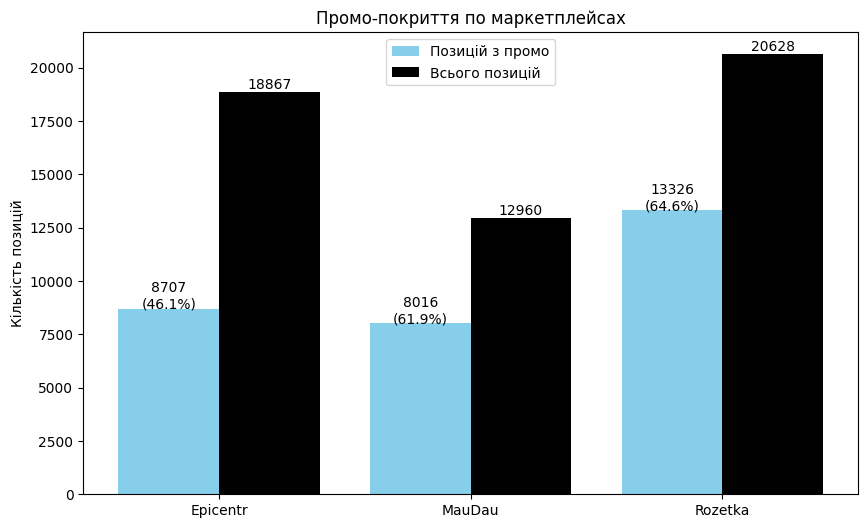

In [60]:
df_promo_reset = df_promo.reset_index()
x = np.arange(len(df_promo_reset['Marketplace']))
width = 0.4

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, df_promo_reset['Позицій з промо'], width, label='Позицій з промо', color ='skyblue')
bars2 = ax.bar(x + width/2, df_promo_reset['Всього позицій'], width, label='Всього позицій', color ='black')


for bar, promo, total in zip(bars1, df_promo_reset['Промо-покриття на маркетплейсі, %'], df_promo_reset['Всього позицій']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{int(height)}\n({promo}%)", ha='center')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{int(height)}", ha='center', va = 'bottom')

ax.set_xticks(x)
ax.set_xticklabels(df_promo_reset['Marketplace'])
ax.set_ylabel('Кількість позицій')
ax.set_title('Промо-покриття по маркетплейсах')
ax.legend()
plt.show()


In [61]:
#Промопокриття по категоріях
df_promo = df_group.groupby(['Marketplace', 'Категорія']).agg(promo = ('discount_amount_uah','count'),
                                               all_sku = ('title','count'),
                                               mean_disc = ('discount_amount_uah', 'mean')).round(1)

df_promo['Промо-покриття на маркетплейсі'] = (df_promo['promo'] / df_promo['all_sku'] * 100).round(1)

total_promo = sum(df_promo['promo'])

df_promo['загальне промо-покриття'] = (df_promo['promo'] / total_promo * 100).round(1)
df_promo.columns = ['Позицій з промо', 'Всього позицій', 'Середня знижка', 'Промо-покриття на маркетплейсі, %','Загальне промо-покриття, %']
df_promo

Позицій з промо  Всього позицій  Середня знижка  \
Marketplace Категорія                                                           
Epicentr    Алкогольні напої             1806            4583           163.1   
            Краса і догляд               2823            6556           247.9   
            Побутова хімія               4082            7728           167.1   
MauDau      Алкогольні напої             3596            6576           184.5   
            Краса і догляд               2401            3216           183.8   
            Побутова хімія               2019            3168           114.0   
Rozetka     Алкогольні напої             6090            6090           327.7   
            Краса і догляд               5427            5427           117.2   
            Побутова хімія               9111            9111            60.5   

                              Промо-покриття на маркетплейсі, %  \
Marketplace Категорія                                             
Epicentr    Алкогольні напої                               39.4   
            Краса і догляд                                 43.1   
            Побутова хімія                                 52.8   
MauDau      Алкогольні напої                               54.7   
            Краса і догляд                                 74.7   
            Побутова хімія                                 63.7   
Rozetka     Алкогольні напої                              100.0   
            Краса і догляд                                100.0   
            Побутова хімія                                100.0   

                              Загальне промо-покриття, %  
Marketplace Категорія                                     
Epicentr    Алкогольні напої                         4.8  
            Краса і догляд                           7.6  
            Побутова хімія                          10.9  
MauDau      Алкогольні напої                         9.6  
            Краса і догляд                           6.4  
            Побутова хімія                           5.4  
Rozetka     Алкогольні напої                        16.3  
            Краса і догляд                          14.5  
            Побутова хімія                          24.4

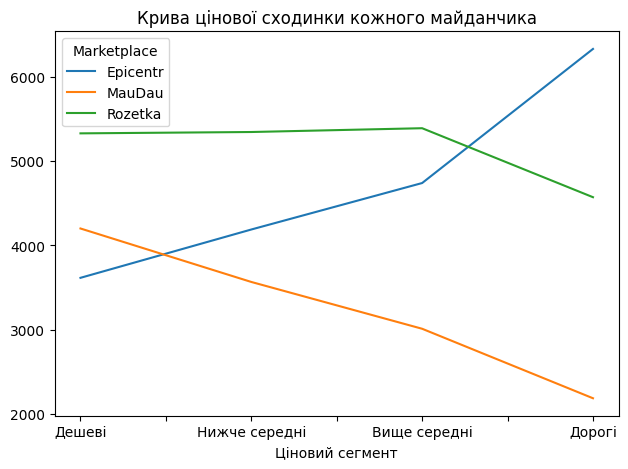

In [62]:
df_pivot = (
    df_group.groupby(['Marketplace', 'percentile_rank'], observed=False)
    .size()
    .unstack('Marketplace')
).plot()
plt.title("Крива цінової сходинки кожного майданчика")
plt.tight_layout()
plt.xlabel('Ціновий сегмент')
plt.show()

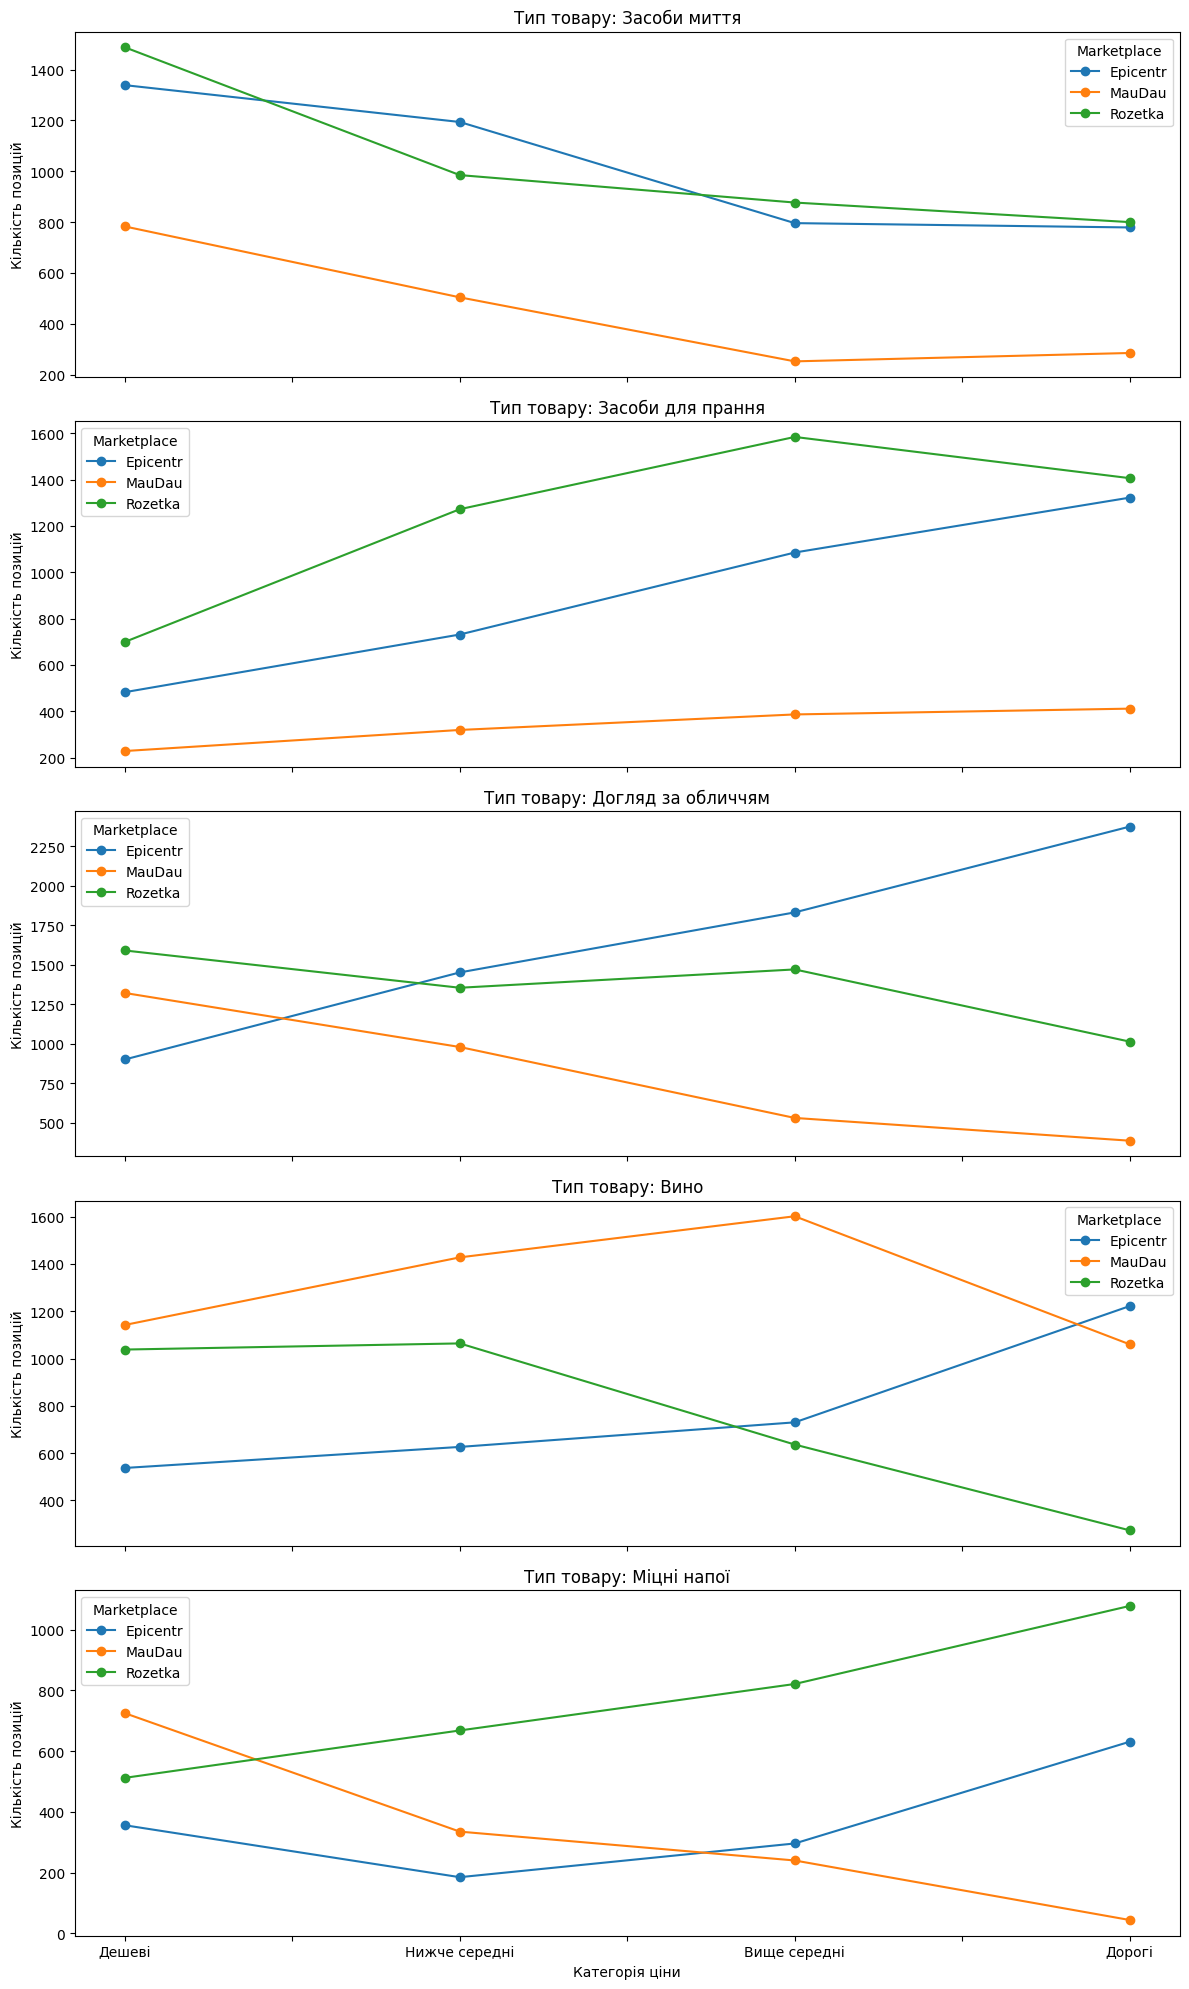

In [63]:
df_pivot = (
    df_group
    .groupby(['Тип товару', 'Marketplace', 'percentile_rank'], observed=False)
    .size()
    .unstack('Marketplace')
)

categories = df_group['Тип товару'].unique()

fig, axes = plt.subplots(len(categories), 1, figsize=(12, 4*len(categories)), sharex=True)

plt.title("Крива цінової сходинки")
for ax, cat in zip(axes, categories):
    df_pivot.loc[cat].plot(ax=ax, marker='o', title=f"Тип товару: {cat}")
    ax.set_ylabel("Кількість позицій")

plt.xlabel("Категорія ціни")
plt.tight_layout()
plt.show()

In [64]:
def price_index_full(df_maudau, df_comp, competitor_name):
    '''
    Price Index MAUDAU до конкурентів
    '''
    def add_segments(df):
        '''Визначається ціна по квантилю'''

        q = df['price'].quantile
        bins = [0, q(0.25), q(0.45),q(0.55), q(0.75), df['price'].max() + 1]
        labels = ['Дешеві','Нижче середні','Середні','Вище середні','Дорогі']
        df = df.copy()
        df['segment'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)
        return df

    df_mau = add_segments(df_maudau)
    df_com = add_segments(df_comp)

    #загальний індекс
    overall_index = (df_mau['price'].median() / df_com['price'].median()) * 100

    #індекс по категоріях
    cat = (
        df_mau.groupby('Категорія')['price'].median().to_frame('mau_median')
        .join(df_com.groupby('Категорія')['price'].median().to_frame('com_median'))
        .dropna()
    )
    cat['price_index'] = (cat['mau_median'] / cat['com_median']) * 100
    cat['m_sku'] = df_mau.groupby('Категорія')['price'].count()
    cat['c_sku'] = df_com.groupby('Категорія')['price'].count()

    #індекс по сегментах
    seg = (
        df_mau.groupby(['Категорія','segment'], observed=True)['price'].median().to_frame('mau_median')
        .join(df_com.groupby(['Категорія','segment'], observed=True)['price'].median().to_frame('com_median'))
        .dropna().reset_index()
        )
    seg['price_index'] = (seg['mau_median'] / seg['com_median']) * 100

    return {
        'competitor': competitor_name,
        'overall_index': overall_index,
        'category_index': cat.reset_index(),
        'segment_index': seg
    }

epicentr = price_index_full(df_maudau, df_epik, 'Epicentr')
rozetka = price_index_full(df_maudau, df_rozetka, 'Rozetka')


In [65]:
#Порівняння з Епіцентром
print(f"Загальний ціновий індекс MauDau до {epicentr['competitor']}", epicentr['overall_index'].round(0))
print(f"MauDau {'дорожчий' if epicentr['overall_index']>100 else 'дешевший'} за {epicentr['competitor']}")

bins = [0, 80, 100, float('inf')]
labels = ['MauDau прайс нижчий за Epicentr', 'MauDau прайс близький до Epicentr', 'MauDau прайс вищий до Epicentr']

print("\nЦіновий індекс за категорією товарів до Epicentr\n")
epicentr['category_index']['Comment'] = pd.cut(
    epicentr['category_index']['price_index'],
    bins=bins,
    labels=labels
)
print(epicentr['category_index'][['Категорія', 'price_index', 'Comment']].round(1))

print("\nЦіновий індекс за ціновим сегментом до Epicentr\n")
epicentr['segment_index']['Comment'] = pd.cut(
    epicentr['segment_index']['price_index'],
    bins=bins,
    labels=labels
)
print(epicentr['segment_index'][['Категорія', 'segment', 'price_index', 'Comment']].round(1))


Загальний ціновий індекс MauDau до Epicentr 75.0
MauDau дешевший за Epicentr

Ціновий індекс за категорією товарів до Epicentr

          Категорія  price_index                            Comment
0  Алкогольні напої         60.6    MauDau прайс нижчий за Epicentr
1    Краса і догляд         38.9    MauDau прайс нижчий за Epicentr
2    Побутова хімія         80.3  MauDau прайс близький до Epicentr

Ціновий індекс за ціновим сегментом до Epicentr

           Категорія        segment  price_index  \
0   Алкогольні напої         Дешеві         81.1   
1   Алкогольні напої  Нижче середні         85.1   
2   Алкогольні напої        Середні         76.3   
3   Алкогольні напої   Вище середні         65.7   
4   Алкогольні напої         Дорогі         38.0   
5     Краса і догляд         Дешеві         81.9   
6     Краса і догляд  Нижче середні         79.7   
7     Краса і догляд        Середні         72.8   
8     Краса і догляд   Вище середні         66.7   
9     Краса і догляд         Д

In [66]:
#Порівняння з Розетка
print(f"Загальний ціновий індекс MauDau до {rozetka['competitor']}", rozetka['overall_index'].round(0))
print(f"MauDau {'дорожчий' if rozetka['overall_index']>100 else 'дешевший'} за {rozetka['competitor']}")

bins = [0, 80, 100, float('inf')]
labels = ['MauDau прайс нижчий за Rozetka', 'MauDau прайс близький до Rozetka', 'MauDau прайс вищий до Rozetka']

print("\nЦіновий індекс за категорією товарів до Rozetka\n")
rozetka['category_index']['Comment'] = pd.cut(
    rozetka['category_index']['price_index'],
    bins=bins,
    labels=labels
)
print(rozetka['category_index'][['Категорія', 'price_index', 'Comment']].round(1))

print("\nЦіновий індекс за ціновим сегментом до Rozetka\n")
rozetka['segment_index']['Comment'] = pd.cut(
    rozetka['segment_index']['price_index'],
    bins=bins,
    labels=labels
)
print(rozetka['segment_index'][['Категорія', 'segment', 'price_index', 'Comment']].round(1))

Загальний ціновий індекс MauDau до Rozetka 102.0
MauDau дорожчий за Rozetka

Ціновий індекс за категорією товарів до Rozetka

          Категорія  price_index                           Comment
0  Алкогольні напої         97.4  MauDau прайс близький до Rozetka
1    Краса і догляд         58.2    MauDau прайс нижчий за Rozetka
2    Побутова хімія         81.1  MauDau прайс близький до Rozetka

Ціновий індекс за ціновим сегментом до Rozetka

           Категорія        segment  price_index  \
0   Алкогольні напої         Дешеві         89.0   
1   Алкогольні напої  Нижче середні         99.0   
2   Алкогольні напої        Середні        100.3   
3   Алкогольні напої   Вище середні        100.0   
4   Алкогольні напої         Дорогі         74.0   
5     Краса і догляд         Дешеві        101.8   
6     Краса і догляд  Нижче середні        100.9   
7     Краса і догляд        Середні        101.2   
8     Краса і догляд   Вище середні         95.2   
9     Краса і догляд         Дорогі  